In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from skimage.io import imread, imshow
from skimage import img_as_float
from skimage.color import rgb2grey
from skimage.transform import resize
from skimage.segmentation import (random_walker, felzenszwalb, 
                                  slic, quickshift, clear_border,
                                  find_boundaries, mark_boundaries, 
                                  watershed, chan_vese, morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set, circle_level_set)

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
e16_5 = 'data/2015-003-026_20X_C57Bl6_E16.5_LMM.14.24.4.41_CSPG4_NKX2.1_ACTA2_001.tif'
p07 = 'data/2015-004-022_20X_C57BL6_PND7_LMM.15.23A.4L.39_ARL13B_EMCN_ACTA2_001.tif'
orig_img = imread(p07)

In [6]:
orig_img = img_as_float(orig_img)

In [7]:
orig_img.shape

(2475, 2475, 3)

## Detail

In [8]:
w = 256
h = 256

img = orig_img[:w, :h, :]

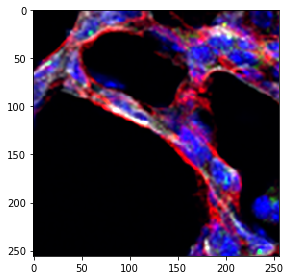

In [9]:
imshow(img)
pass

In [10]:
red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]

In [11]:
list(map(np.median, [red, green, blue]))

[0.0, 0.0, 0.010345616845960174]

In [12]:
t1 = (red < np.median(red)) 
t1 &= (green < np.median(green)) 
t1 &= (blue < np.median(blue))
t2 = red > np.percentile(red, 0.9)
t3 = green > np.percentile(green, 0.9)
t4 = blue > np.percentile(blue, 0.9)

### Random walker

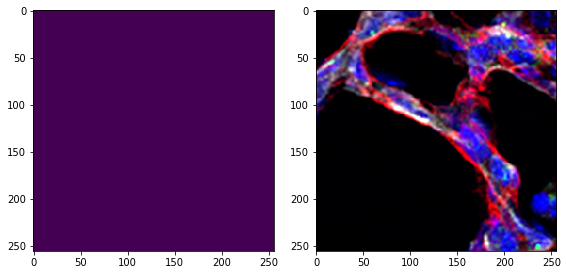

In [13]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t1] = 2
segments = random_walker(img, labels)
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

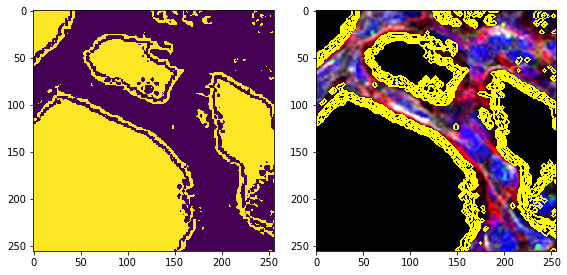

In [14]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 2
labels[t2] = 1
segments = random_walker(img, labels)
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

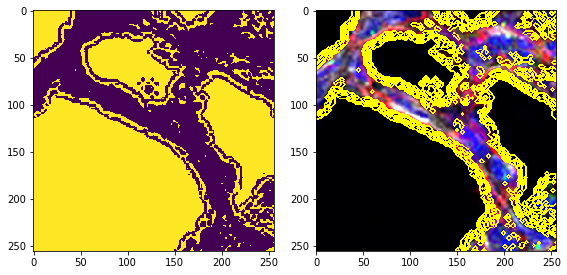

In [15]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 2
labels[t3] = 1
segments = random_walker(img, labels)
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

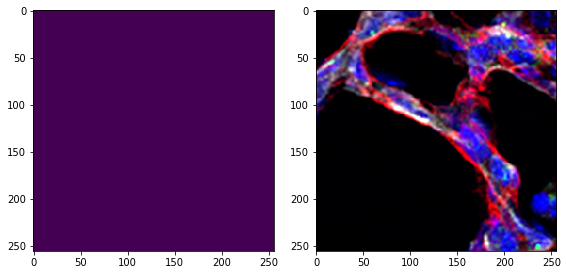

In [16]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t3] = 1
labels[t1] = 2
segments = random_walker(img, labels)
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

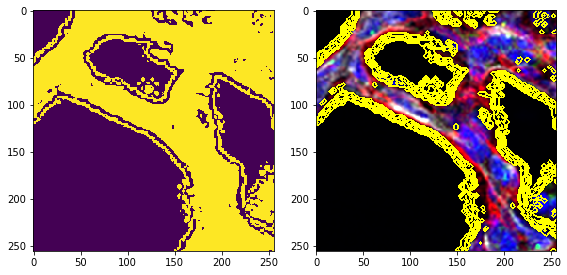

In [17]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t1] = 2
labels[t2] = 3
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### Watershed

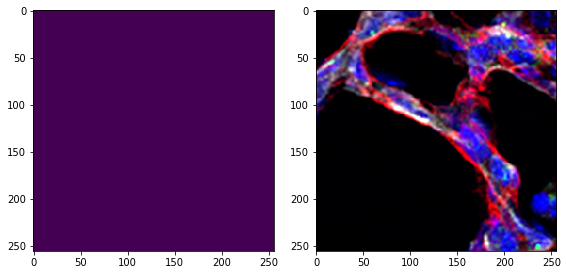

In [18]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t1] = 2
segments = watershed(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

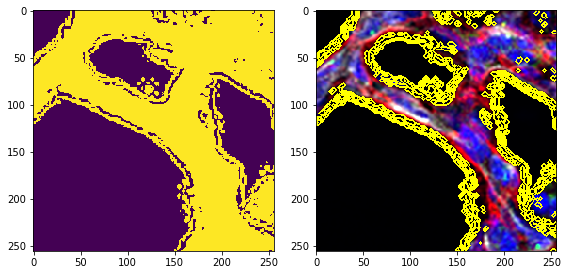

In [19]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t2] = 2
labels[t3] = 2
segments = watershed(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

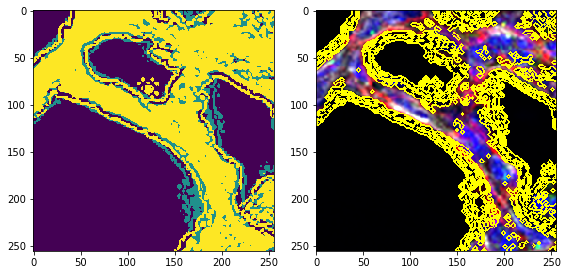

In [20]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t2] = 2
labels[t3] = 3
labels[t1] = 4
segments = watershed(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### felzenszwalb

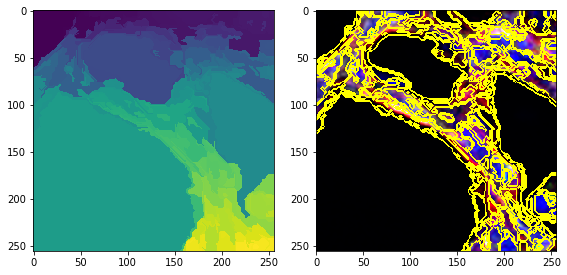

In [21]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 100
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

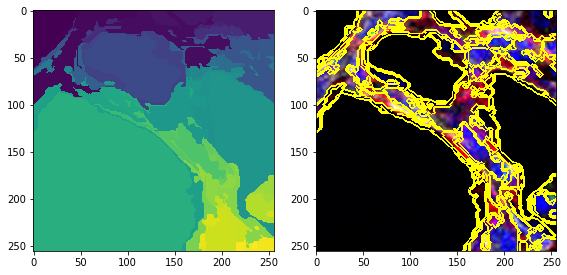

In [22]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 200
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

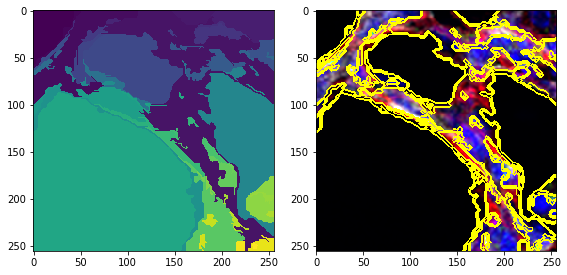

In [23]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 300
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

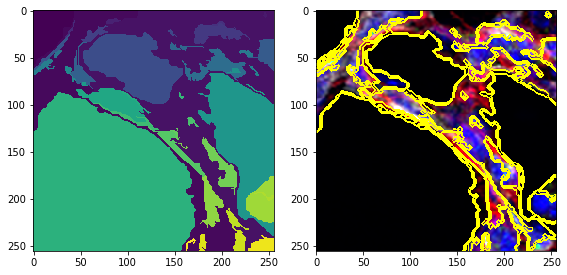

In [24]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 400
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

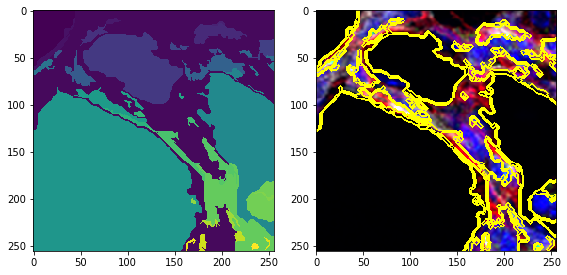

In [25]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 500
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

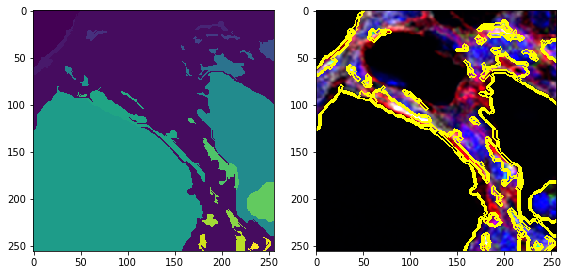

In [26]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 1000
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### SLIC

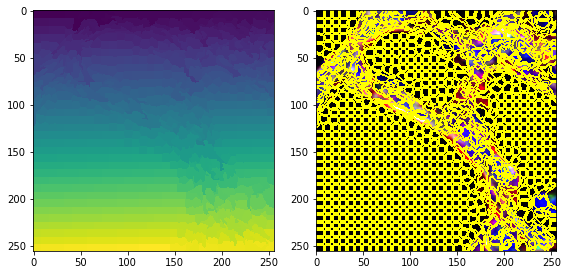

In [27]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 10
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

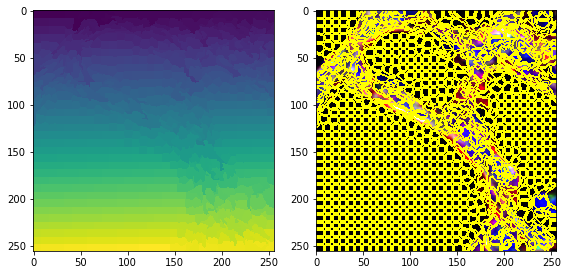

In [28]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 50
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

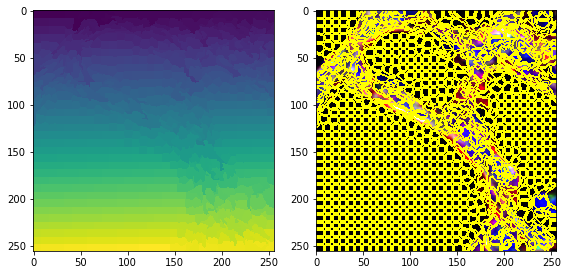

In [29]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 100
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

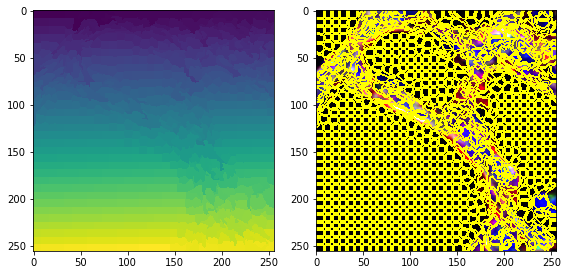

In [30]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 200
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

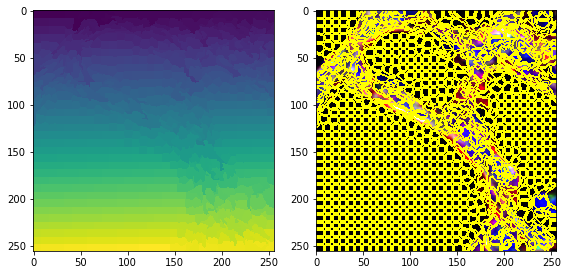

In [31]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 500
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

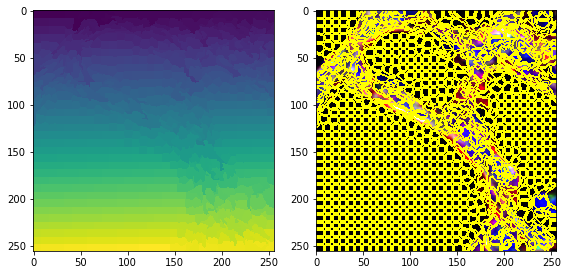

In [32]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 1000
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### Qucikshift

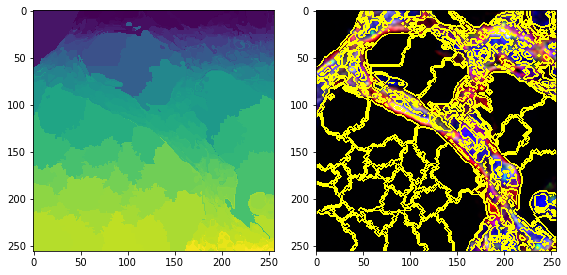

In [33]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 1
max_dist = 10
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
bndc = clear_border(bnd)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

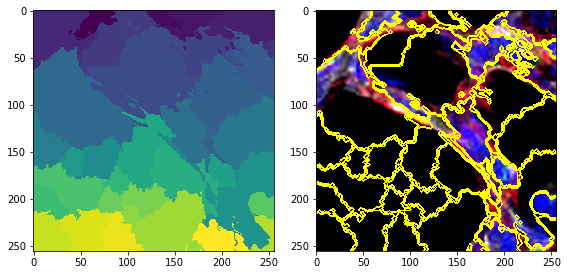

In [34]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 1
max_dist = 100
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

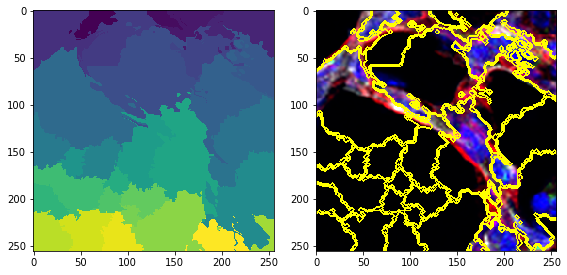

In [35]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 1
max_dist = 1000
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')

imshow(img2)
pass

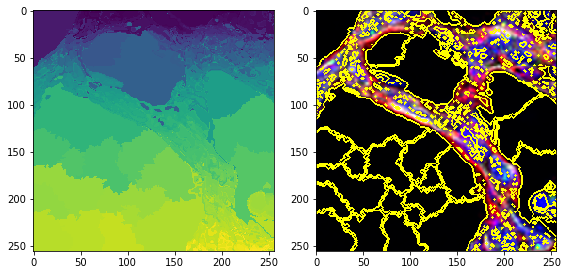

In [36]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 10
max_dist = 100
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

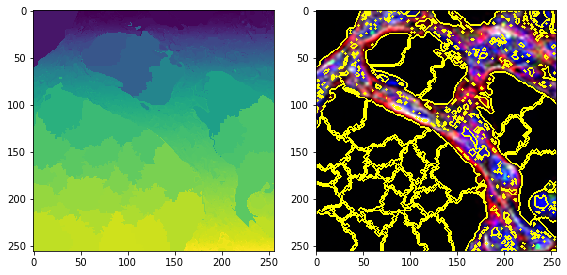

In [37]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 2
max_dist = 10
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### Chan-vese

In [38]:
gimg = rgb2grey(img)

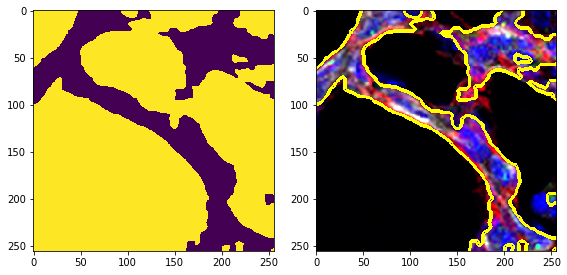

In [39]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.1
segments = chan_vese(gimg, mu=mu)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

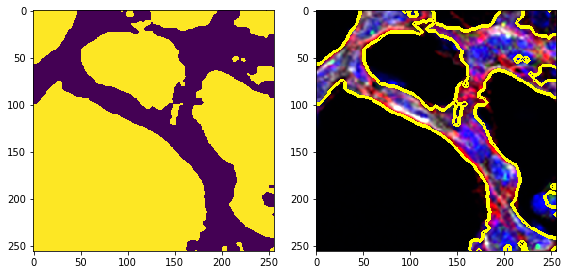

In [40]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.25
segments = chan_vese(gimg, mu=mu)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

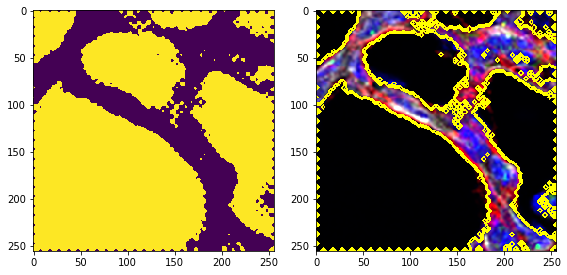

In [41]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.5
segments = chan_vese(gimg, mu=mu)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

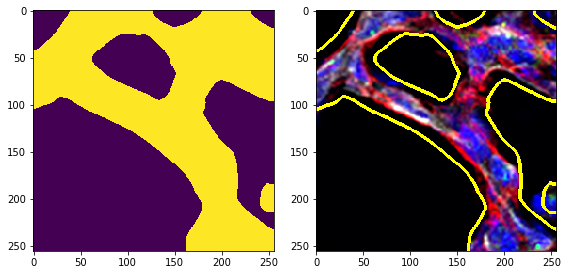

In [42]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.25
lambda1=1.0
lambda2=2.0
segments = chan_vese(gimg, mu=mu, lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

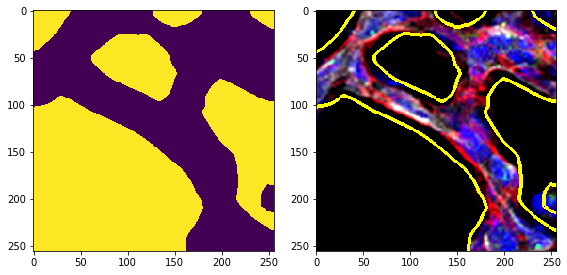

In [43]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.25
lambda1=2.0
lambda2=1.0
segments = chan_vese(gimg, mu=mu, lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### morphological chan vese

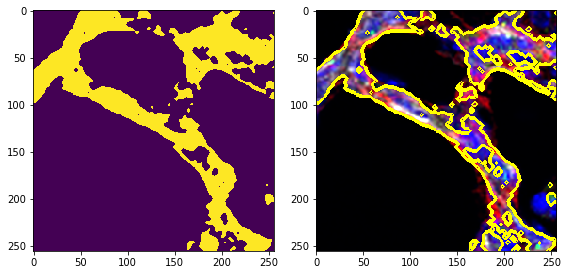

In [44]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=1
lambda1=1.0
lambda2=1.0
iterations=100
segments = morphological_chan_vese(gimg, iterations, smoothing=smoothing, 
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

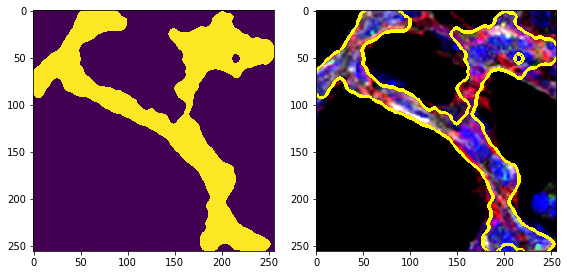

In [45]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100
segments = morphological_chan_vese(gimg, iterations, smoothing=smoothing, 
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

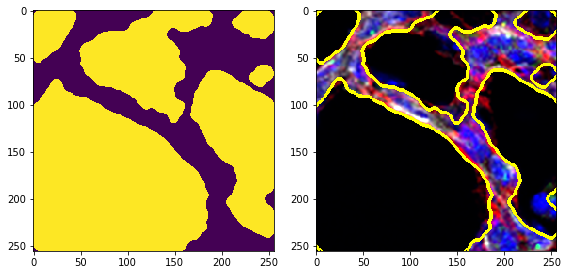

In [46]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100

init_level_set=checkerboard_level_set(gimg.shape, square_size=2)

segments = morphological_chan_vese(gimg, iterations, smoothing=smoothing, 
                                   init_level_set=init_level_set,
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

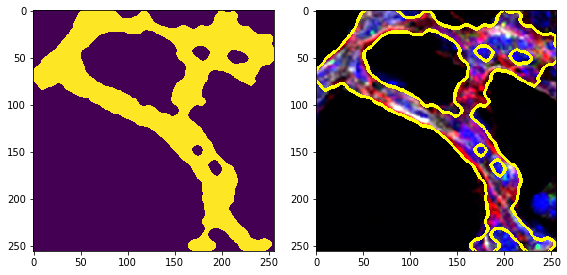

In [47]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100

init_level_set=checkerboard_level_set(gimg.shape, square_size=5)

segments = morphological_chan_vese(img[:,:,0], iterations, smoothing=smoothing, 
                                   init_level_set=init_level_set,
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

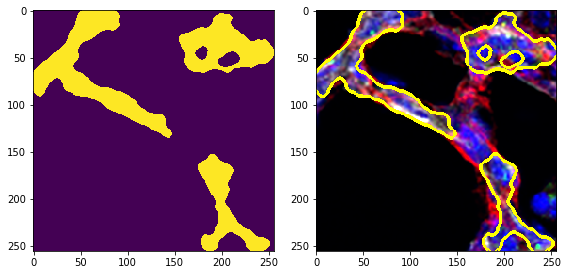

In [48]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100

init_level_set=checkerboard_level_set(gimg.shape, square_size=5)

segments = morphological_chan_vese(img[:,:,1], iterations, smoothing=smoothing, 
                                   init_level_set=init_level_set,
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

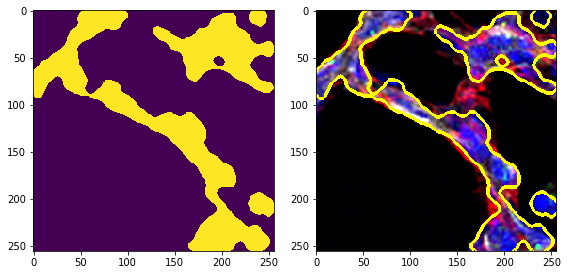

In [49]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100

init_level_set=checkerboard_level_set(gimg.shape, square_size=5)

segments = morphological_chan_vese(img[:,:,2], iterations, smoothing=smoothing, 
                                   init_level_set=init_level_set,
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### morphological_geodesic_active_contour

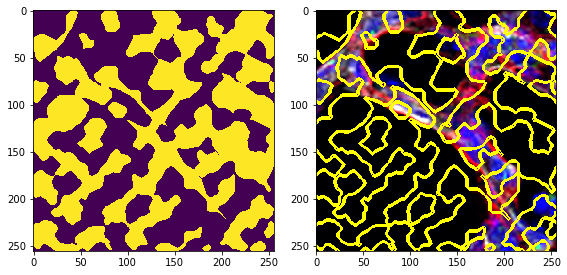

In [50]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

alpha=100.0
sigma=5.0
gimage = inverse_gaussian_gradient(gimg)

smoothing=2
iterations=10

init_level_set=checkerboard_level_set(gimg.shape, square_size=25)

segments = morphological_geodesic_active_contour(
    gimage, iterations, init_level_set=init_level_set, smoothing=smoothing)

plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

## Global

In [51]:
w = 256
h = 256

img = resize(orig_img, (w, h, 3))

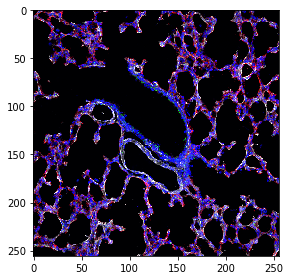

In [52]:
imshow(img)
pass

In [53]:
red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]

In [54]:
list(map(np.median, [red, green, blue]))

[0.0, 0.0, 0.010739167582264102]

In [55]:
t1 = (red < np.median(red)) 
t1 &= (green < np.median(green)) 
t1 &= (blue < np.median(blue))
t2 = red > np.percentile(red, 0.9)
t3 = green > np.percentile(green, 0.9)
t4 = blue > np.percentile(blue, 0.9)

### Random walker

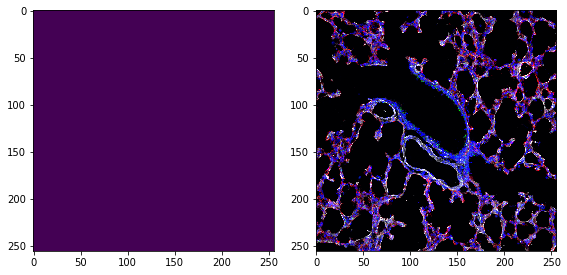

In [56]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t1] = 2
segments = random_walker(img, labels)
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

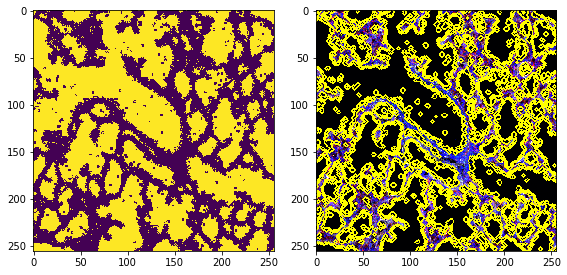

In [57]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 2
labels[t2] = 1
segments = random_walker(img, labels)
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

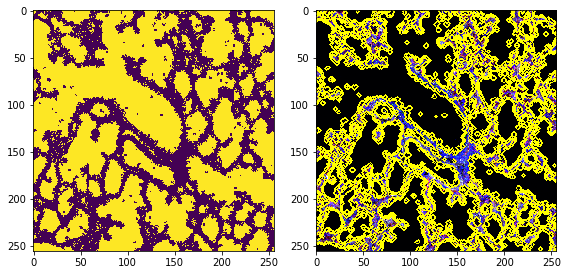

In [58]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 2
labels[t3] = 1
segments = random_walker(img, labels)
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

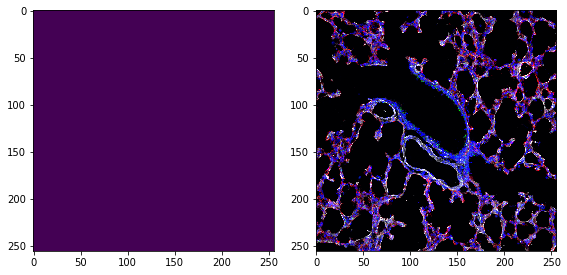

In [59]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t3] = 1
labels[t1] = 2
segments = random_walker(img, labels)
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

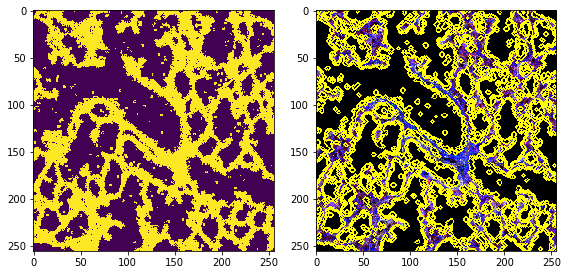

In [60]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t1] = 2
labels[t2] = 3
segments = random_walker(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### Watershed

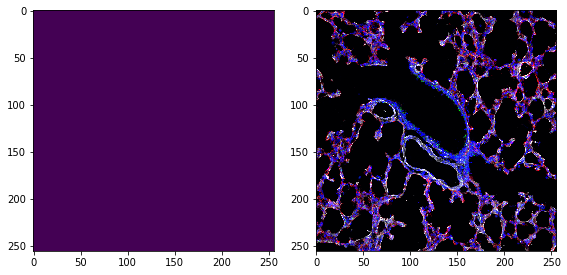

In [61]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t1] = 2
segments = watershed(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

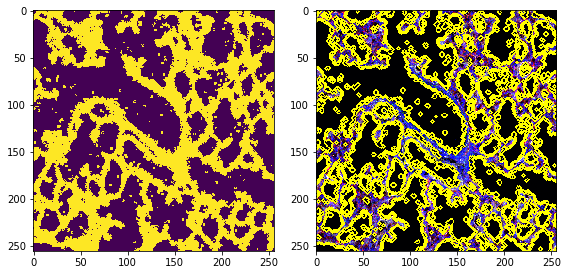

In [62]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t2] = 2
labels[t3] = 2
segments = watershed(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

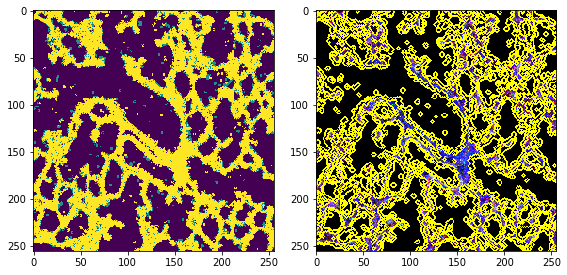

In [63]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
labels = np.zeros((img.shape[0], img.shape[1], 3))
labels[t4] = 1
labels[t2] = 2
labels[t3] = 3
labels[t1] = 4
segments = watershed(img, labels)[:,:,0]
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### felzenszwalb

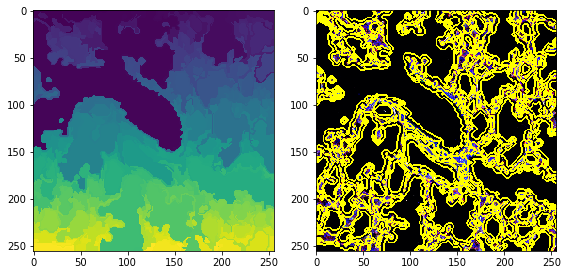

In [64]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 100
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

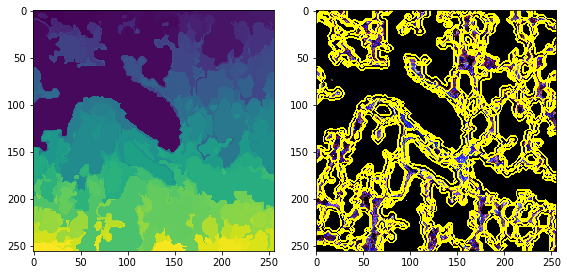

In [65]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 200
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

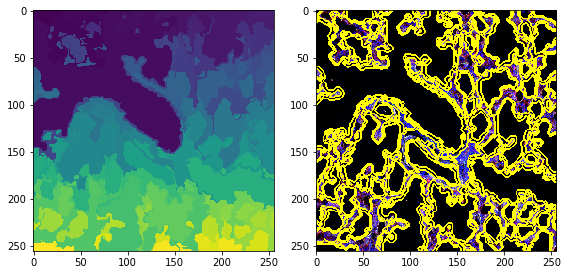

In [66]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 300
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

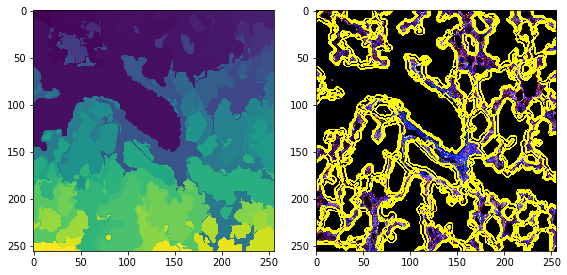

In [67]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 400
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

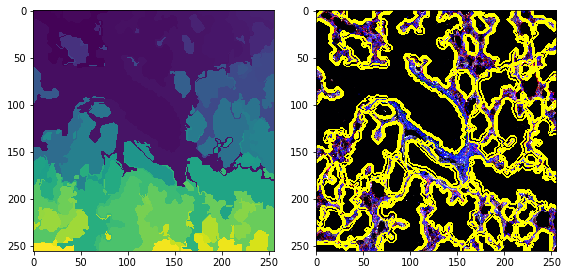

In [68]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 500
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

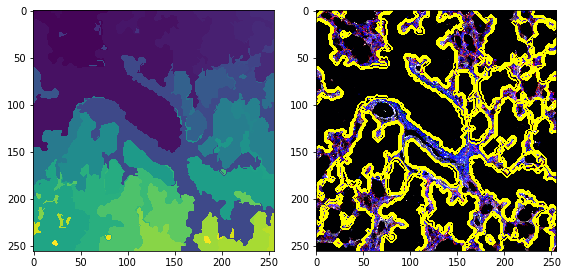

In [69]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
scale = 1000
segments = felzenszwalb(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### SLIC

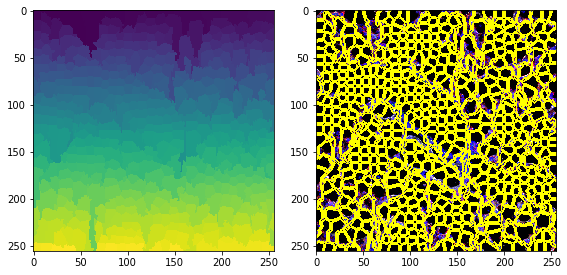

In [70]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 10
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

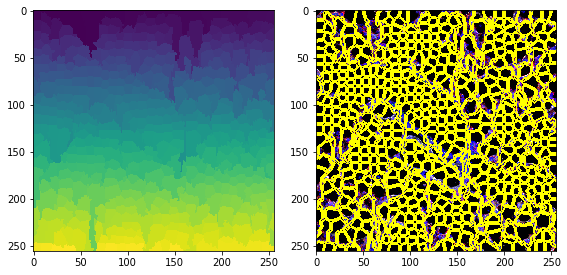

In [71]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 50
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

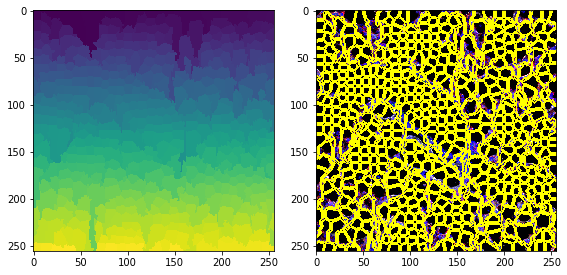

In [72]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 100
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

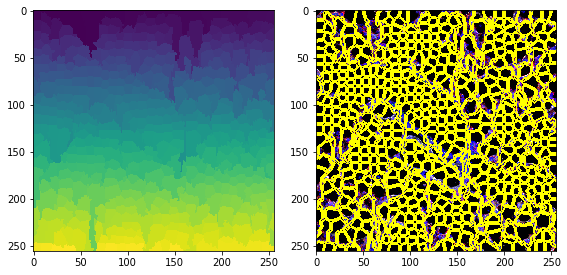

In [73]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 200
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

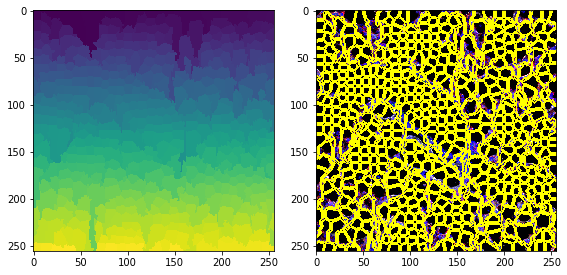

In [74]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 500
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

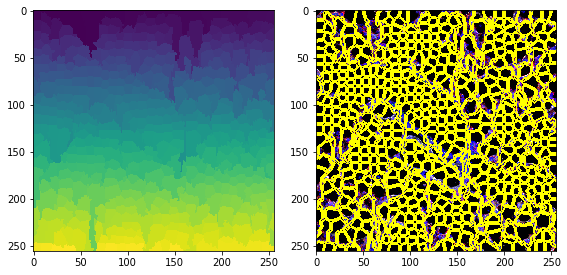

In [75]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
n_segments = 1000
segments = slic(img, scale)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### Qucikshift

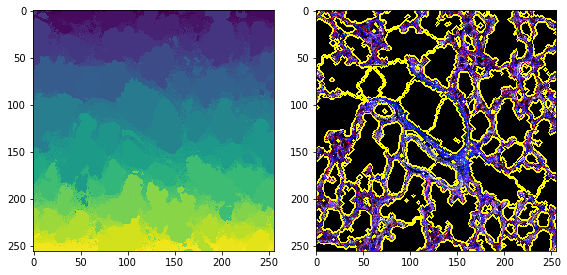

In [76]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 1
max_dist = 10
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
bndc = clear_border(bnd)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

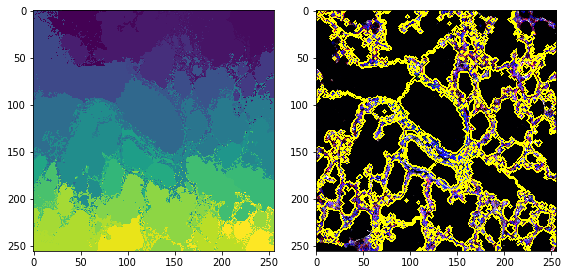

In [77]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 1
max_dist = 100
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

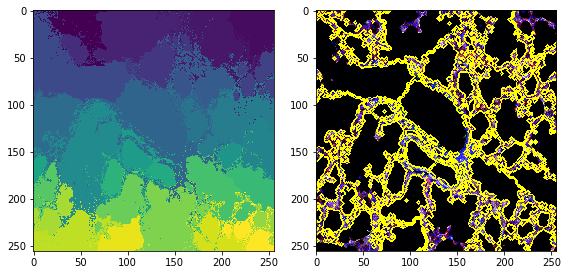

In [78]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 1
max_dist = 1000
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')

imshow(img2)
pass

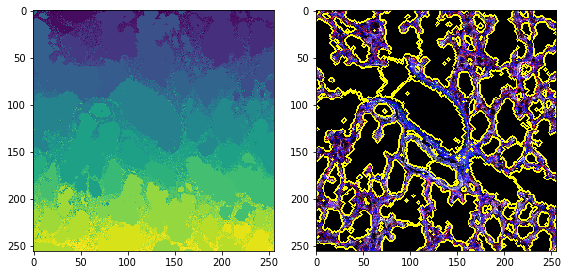

In [79]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 10
max_dist = 100
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

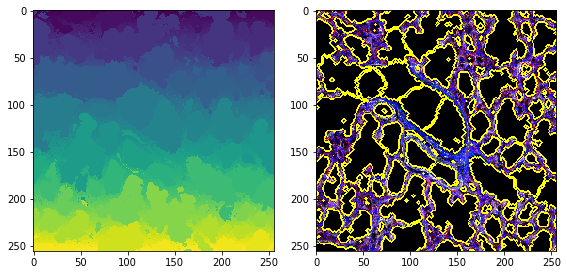

In [80]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ratio = 2
max_dist = 10
segments = quickshift(img, ratio=ratio, max_dist=max_dist)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### Chan-vese

In [81]:
gimg = rgb2grey(img)

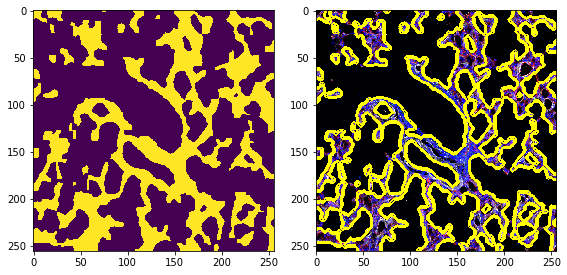

In [82]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.1
segments = chan_vese(gimg, mu=mu)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

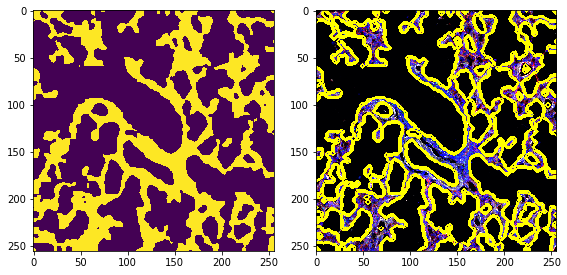

In [83]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.25
segments = chan_vese(gimg, mu=mu)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

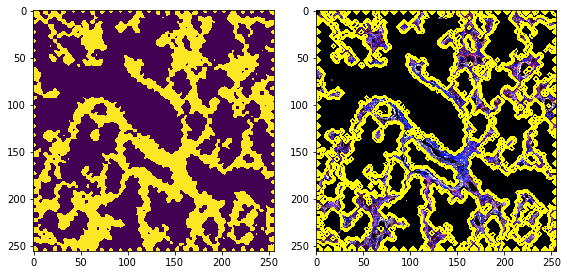

In [84]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.5
segments = chan_vese(gimg, mu=mu)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

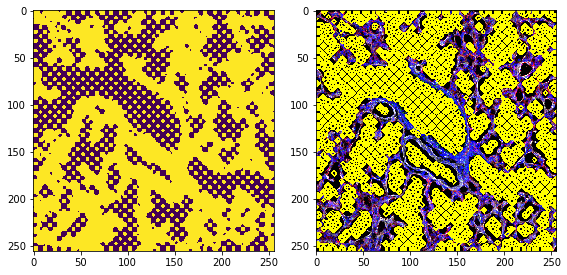

In [85]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.25
lambda1=1.0
lambda2=1.25
segments = chan_vese(gimg, mu=mu, lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

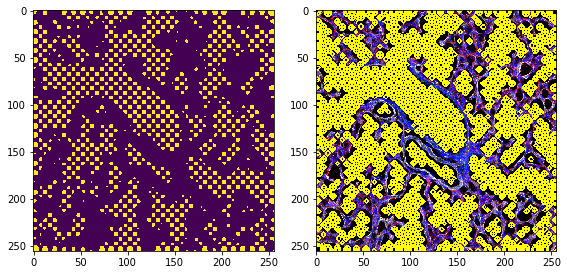

In [86]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
mu=0.25
lambda1=1.25
lambda2=1.0
segments = chan_vese(gimg, mu=mu, lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### morphological chan vese

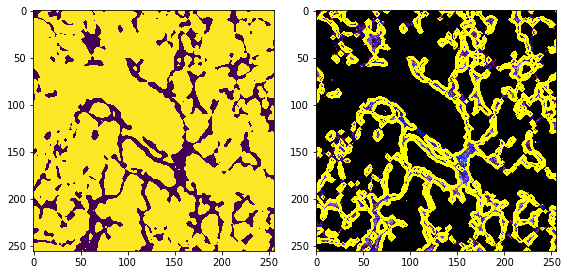

In [87]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=1
lambda1=1.0
lambda2=1.0
iterations=100
segments = morphological_chan_vese(gimg, iterations, smoothing=smoothing, 
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

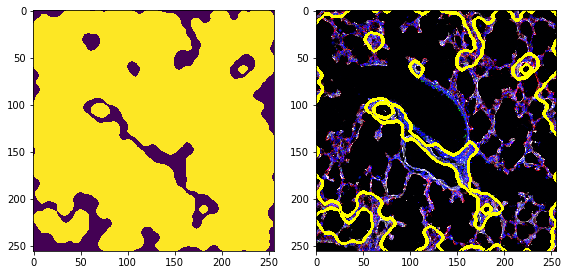

In [88]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100
segments = morphological_chan_vese(gimg, iterations, smoothing=smoothing, 
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

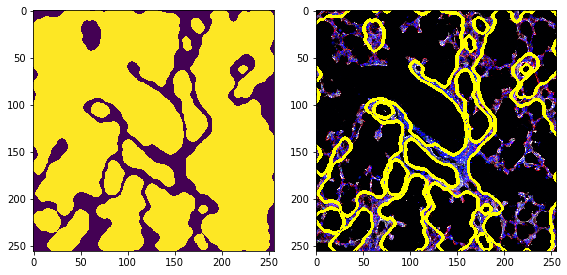

In [89]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100

init_level_set=checkerboard_level_set(gimg.shape, square_size=2)

segments = morphological_chan_vese(gimg, iterations, smoothing=smoothing, 
                                   init_level_set=init_level_set,
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

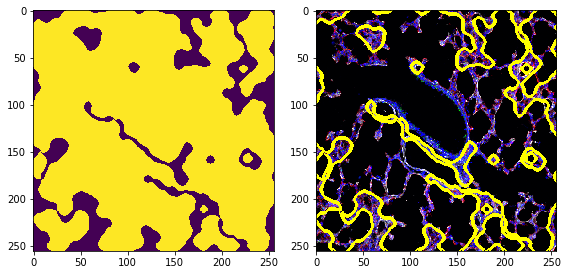

In [90]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100

init_level_set=checkerboard_level_set(gimg.shape, square_size=5)

segments = morphological_chan_vese(img[:,:,0], iterations, smoothing=smoothing, 
                                   init_level_set=init_level_set,
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

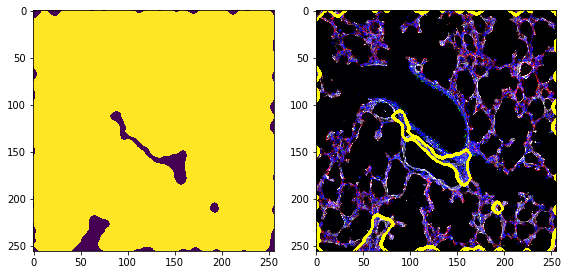

In [91]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100

init_level_set=checkerboard_level_set(gimg.shape, square_size=5)

segments = morphological_chan_vese(img[:,:,1], iterations, smoothing=smoothing, 
                                   init_level_set=init_level_set,
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

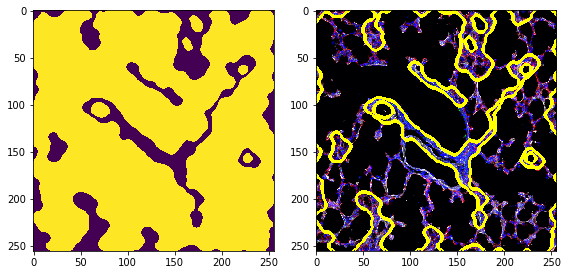

In [92]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
smoothing=4
lambda1=1.0
lambda2=1.0
iterations=100

init_level_set=checkerboard_level_set(gimg.shape, square_size=5)

segments = morphological_chan_vese(img[:,:,2], iterations, smoothing=smoothing, 
                                   init_level_set=init_level_set,
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass

### morphological_geodesic_active_contour

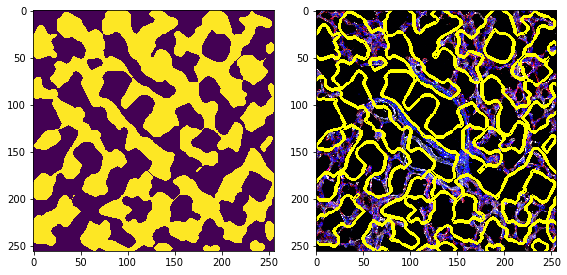

In [93]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

alpha=100.0
sigma=5.0
gimage = inverse_gaussian_gradient(gimg)

smoothing=2
iterations=10

init_level_set=checkerboard_level_set(gimg.shape, square_size=25)

segments = morphological_geodesic_active_contour(
    gimage, iterations, init_level_set=init_level_set, smoothing=smoothing)

plt.imshow(segments)
plt.imshow(segments)
plt.subplot(1,2,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
pass